In [1]:
import pickle as pck
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
# import pylandau as pland
# import ROOT
import sys
import scipy.ndimage as ndimage
import numpy.ma as ma

def gaussian(x, a, mean, sigma):
    return a * np.exp(-((x - mean)**2 / (2 * sigma**2)))
    

def diffution_curve(z, alpha, beta):
    return (alpha * np.log(1 - beta * z))**(0.5)
    
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import A4, letter
from reportlab.lib.utils import ImageReader

In [2]:
plt.rcParams.update({
    "image.origin": "lower",
    "image.aspect": 1,
    #"text.usetex": True,
    "grid.alpha": .5,
    "axes.linewidth":2,
    "lines.linewidth" : 1,
    "font.size":    15.0,
    "xaxis.labellocation": 'right',  # alignment of the xaxis label: {left, right, center}
    "yaxis.labellocation": 'top',  # alignment of the yaxis label: {bottom, top, center}
    "xtick.top":           True ,  # draw ticks on the top side
    "xtick.major.size":    8    ,# major tick size in points
    "xtick.minor.size":    4      ,# minor tick size in points
    "xtick.direction":     'in',
    "xtick.minor.visible": True,
    "ytick.right":           True ,  # draw ticks on the top side
    "ytick.major.size":    8    ,# major tick size in points
    "ytick.minor.size":    4      ,# minor tick size in points
    "ytick.direction":     'in',
    "ytick.minor.visible": True,
    "ytick.major.width":   2   , # major tick width in points
    "ytick.minor.width":   1 ,
    "xtick.major.width":   2   , # major tick width in points
    "xtick.minor.width":   1 ,
    "legend.framealpha": 0 ,
    "legend.loc": 'best',

})

In [3]:
# path = '/home/bruce/Documents/Programas/Catalogo_Eventos/dict__straight_muons_Extensions_1_to_4_Imgs_2078_Elip_0.8_ADUs__.pkl'
# path = '/home/bruce/Documents/Programas/Catalogo_Eventos/dict__straight_muons_Extensions_1_to_4_Imgs_2078_Elip_0.8_Sol_0.8_ADUs__.pkl'
# path = '/home/bruce/Documents/Programas/Catalogo_Eventos/dict__straight_muons_Extensions_1_to_4_Imgs_2078_Elip_0.7_Sol_0.85_ADUs__.pkl' ## Demasiados eventos redondos

path = '/home/bruce/Documents/Programas/Catalogo_Eventos/dict__straight_muons_Extensions_1_to_4_Imgs_2078_Elip_0.85_Sol_0.7_ADUs__.pkl' ## De aquí se sacó las gráficas de difusión
# path = '/home/bruce/Documents/Programas/Catalogo_Eventos/dict__straight_muons_Extensions_1_to_4_Imgs_2078_Elip_0_Sol_0.7_ADUs__.pkl'
# path =  '/home/bruce/Documents/Programas/Catalogo_Eventos/dict__straight_muons_Extensions_1_to_4_Imgs_2078_Elip_0.9_Sol_0.7_ADUs__.pkl'  ## Ya se hizo un PDf es este archivo

##### PAths de ADUS ###
path = '/home/labdet/Documents/MauSan/Programas/Repositorio_Git/Catalogo_Eventos/Diccionarios_Espetro_Muones/dict__straight_muons_Extensions_1_to_4_Imgs_2078_Elip_0.9_Sol_0.7_ADUs__.pkl'
histogram = open(path, 'rb')
data_histogram = pck.load(histogram)
histogram.close()

In [4]:
print('Llaves principales del diccionario: ', data_histogram.keys())
print('Llaves secundarias por extensión: ', data_histogram['extension_1'].keys(), end='\n\n')


print('Muones rectos y verticales detectados en total: ',data_histogram['All_Muons_Detected'])

Llaves principales del diccionario:  dict_keys(['All_Muons_Detected', 'extension_1', 'extension_2', 'extension_4'])
Llaves secundarias por extensión:  dict_keys(['charge', 'Vertical_Events', 'Horizontal_Events'])

Muones rectos y verticales detectados en total:  429


In [5]:
matrix_ext_1_vertical = data_histogram['extension_1']['Vertical_Events']
matrix_ext_1_horizontal = data_histogram['extension_1']['Horizontal_Events']

matrix_ext_2_vertical = data_histogram['extension_2']['Vertical_Events']
matrix_ext_2_horizontal = data_histogram['extension_2']['Horizontal_Events']

matrix_ext_4_vertical = data_histogram['extension_4']['Vertical_Events']
matrix_ext_4_horizontal = data_histogram['extension_4']['Horizontal_Events']

print('Muones verticales en ext_1: ', len(matrix_ext_1_vertical))
print('Muones verticales en ext_2: ', len(matrix_ext_2_vertical))
print('Muones verticales en ext_4: ', len(matrix_ext_4_vertical))
print('Muones verticales totales detectados: ', len(matrix_ext_1_vertical) + len(matrix_ext_2_vertical) + len(matrix_ext_4_vertical), end = '\n\n')

print('Muones horizontales en ext_1: ', len(matrix_ext_1_horizontal))
print('Muones horizontales en ext_2: ', len(matrix_ext_2_horizontal))
print('Muones horizontales en ext_4: ', len(matrix_ext_4_horizontal))
print('Muones horizontales totales detectados: ', len(matrix_ext_1_horizontal) + len(matrix_ext_2_horizontal) + len(matrix_ext_4_horizontal))

Muones verticales en ext_1:  107
Muones verticales en ext_2:  97
Muones verticales en ext_4:  103
Muones verticales totales detectados:  307

Muones horizontales en ext_1:  41
Muones horizontales en ext_2:  29
Muones horizontales en ext_4:  52
Muones horizontales totales detectados:  122


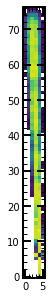

In [67]:
figure , axs = plt.subplots(1,1,figsize=[5,5])
# axs.imshow(matrix_ext_1_vertical[909]) # 131, 508, 686, 1166, 1610, 2769, 3224, 3493 indices para path con elip 0.85, Sol 0.7 
# axs.imshow(matrix_ext_2_vertical[1725])  # 56, 107, 133, 335, 587, 821, 884, 1206, 1454, 1926
# axs.imshow(np.flip(matrix_ext_4_vertical[99], 0))  # 77, 1911, 2381, 2930 indices para path con elip 0.85, Sol 0.7
axs.imshow(matrix_ext_4_vertical[11])  # 77, 1911, 2381, 2930 indices para path con elip 0.85, Sol 0.7

## 5, 6, 11, 20, 27, 30, 71, 72, 79, 83, 85, 92, 96, 97, 
plt.show()

In [7]:
list_index_long_muons = []

for index in np.arange(0, len(matrix_ext_4_vertical)):
    size_x = matrix_ext_4_vertical[index].shape[1]
    size_y = matrix_ext_4_vertical[index].shape[0]
    if size_y > 60:
        # print(size_x, size_y)
        list_index_long_muons.append(index)

# print(list_index_long_muons)+
print('Muones largos detectados: ', len(list_index_long_muons))
print('Indices: ', list_index_long_muons)

Muones largos detectados:  38
Indices:  [3, 5, 6, 11, 13, 19, 20, 22, 23, 24, 27, 28, 30, 32, 37, 39, 41, 42, 49, 53, 55, 57, 61, 62, 71, 72, 74, 77, 79, 83, 85, 87, 92, 93, 96, 97, 98, 99]


## Perfil Energético

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


15763509.0


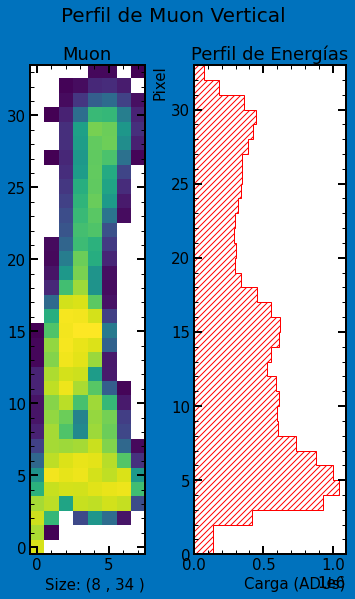

In [186]:
num = 79

fig, axs = plt.subplots(ncols=2, nrows=1, figsize = [6,9], facecolor = [0, 0.4470, 0.7410])
fig.suptitle('Perfil de Muon Vertical', y = 0.97, size = 20)

for event in matrix_ext_1_vertical[num:num + 1]:
    # plt.imshow(event)
    size_x = event.shape[1]
    size_y = event.shape[0]
    print(event.sum())

    label_verticalMuon, nlabels_verticalMuon = ndimage.label(event,structure=[[0,0,0],[1,1,1],[0,0,0]])

    charge_verticalMuon = []
    for lable_line in range(1, nlabels_verticalMuon):
        line = label_verticalMuon == lable_line
        loc = ndimage.find_objects(label_verticalMuon == lable_line)[0]
        mask_35 = np.invert(label_verticalMuon == lable_line)
        data_mask = ma.masked_array(event[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop], mask_35[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop])
        charge = data_mask.sum()
        mean_charge = data_mask.mean()

        charge_verticalMuon.append(charge)
        # print(charge)

    x0 = axs[0].imshow(event)
    axs[0].set_title('Muon')
    axs[0].set_xlabel('Size: (' + str(size_x) + ' , ' + str(size_y) + ' )')
    # x0bar = fig.colorbar(x0, ax=axs[0])

    axs[1].stairs(charge_verticalMuon, np.arange(0,len(charge_verticalMuon)+1),  orientation='horizontal', hatch = '////', color = 'r')
    # axs[1].vlines(x = mean_charge, ymin = 0, ymax = len(event) - 1, color = 'k', label = 'Mean Charge \n' + str(mean_charge))
    axs[1].set_xlabel('Carga (ADUs)')
    axs[1].set_ylabel('Pixel')
    axs[1].set_ylim(0,len(event) - 1 )
    axs[1].set_title('Perfil de Energías')
    axs[1].legend()
    plt.show()

# Modelo de Difusión

## Ajuste de Gaussiana por linea

In [81]:
lable_line = 5

/home/labdet/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Centroide:  4.500277044182749  Amplitud:  77751.22959310967 sigma:  0.033109068311827757


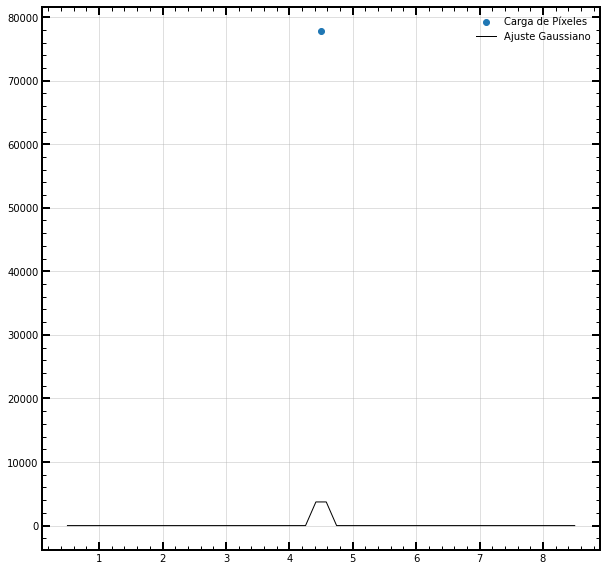

In [82]:

event = matrix_ext_4_vertical[11]

# plt.imshow(event)
size_x = event.shape[1]
size_y = event.shape[0]

label_verticalMuon, nlabels_verticalMuon = ndimage.label(event,structure=[[0,0,0],[1,1,1],[0,0,0]])

# plt.imshow(label_verticalMuon == 13)
# plt.colorbar()
# plt.show()

# print(nlabels_verticalMuon)
line = label_verticalMuon == lable_line
loc = ndimage.find_objects(label_verticalMuon == lable_line)[0]
mask_35 = np.invert(label_verticalMuon == lable_line)
data_mask = ma.masked_array(event[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop], mask_35[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop])
# print(data_mask[0])
Longitud_linea = len(data_mask[0])


fig_all, axs_all = plt.subplots(1, 1, figsize=(10, 10))
# fig, axs_all = plt.subplots(subplot_kw={"projection": "3d"}, figsize = [10,10])


# Bins = len(data_mask[0]) + 20


# list_xlabel = []
# for index in np.arange(0, len(data_mask[0])):
#     list_xlabel.append(index)

# print(data_mask[0])
list_xlabel = np.arange(0.5, len(data_mask[0]), 1)
# list_xlabel_= [1.5, 2.5, 3.5]

list_xlabel_long = np.linspace(-Longitud_linea + int(Longitud_linea/2) , Longitud_linea + int(Longitud_linea/2))
# for index in np.arange(-3, 10):
#     list_xlabel_long.append(index)

# axs_all.scatter(list_xlabel, data_mask[0], 0, 'o', label = 'Carga de Píxeles')
axs_all.scatter(list_xlabel, data_mask[0], label = 'Carga de Píxeles')


# for point in np.arange(1, Longitud_linea):
#     axs_all.vlines(ymin=0, ymax=data_mask[0][point], x=list_xlabel[point], linestyles='dashed', colors='k')
# axs_all.hist(data_mask[0])

# bin_heights, bin_borders, _ = plt.hist(data_mask[0], bins = 50)#, range=[6000, 12000]) #'auto'
# bin_centers = np.zeros(len(bin_heights), dtype=float)
# offset_fit = bin_borders[np.argmax(bin_heights)]

# for p in range(len(bin_heights)):
#     bin_centers[p]=(bin_borders[p+1]+bin_borders[p])/2

# # xmin_fit, xmax_fit = offset_fit-(10*expgain[extension-1])/math.sqrt(nsamp), offset_fit+(10*expgain[extension-1])/math.sqrt(nsamp)			# Define fit range
# xmin_fit, xmax_fit = bin_centers[0], bin_centers[-1]
# bin_heights = bin_heights[(bin_centers>xmin_fit) & (bin_centers<xmax_fit)]
# bin_centers = bin_centers[(bin_centers>xmin_fit) & (bin_centers<xmax_fit)]

popt, pcov = curve_fit(gaussian, list_xlabel, data_mask[0],maxfev = 10000000)
# popt, pcov = curve_fit(gaussian, bin_centers, bin_heights, maxfev=10000000, p0 = [10,10000,2])		# Fit histogram with gaussian

dict_popt = {'Mean' : popt[1], 'Hight' : popt[0], 'sigma' : abs(popt[2]), 'Pcov' : pcov}

Centroide = popt[1]
list_xlabel_long = np.linspace( Centroide - 4 , Centroide + 4)

# axs_all.plot(bin_centers, gaussian(bin_centers, *popt), 'k', label = 'Ajuste Gaussiano')	
axs_all.plot(list_xlabel_long, gaussian(list_xlabel_long, *popt), 'k', label = 'Ajuste Gaussiano')	
axs_all.legend()
axs_all.grid()

# fig.suptitle('Ajuste por renglon ')

print('Centroide: ',popt[1], ' Amplitud: ', popt[0], 'sigma: ', abs(popt[2]))  #gaussian(x, a, mean, sigma)


# for lable_line in range(1, nlabels_verticalMuon):
#     line = label_verticalMuon == lable_line
#     loc = ndimage.find_objects(label_verticalMuon == lable_line)[0]
#     mask_35 = np.invert(label_verticalMuon == lable_line)
#     data_mask = ma.masked_array(event[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop], mask_35[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop])
#     # plt.imshow(data_mask)
#     print(data_mask.mask)
#     # charge = data_mask.sum()
    # mean_charge = data_mask.mean()


## Todas las gaussianas de un muon

n_labels:  77
Means:  8.0 2.2514113573023753
Sigmas:  2.575525836277581 2.177838423308428
Num_sig:  69
69


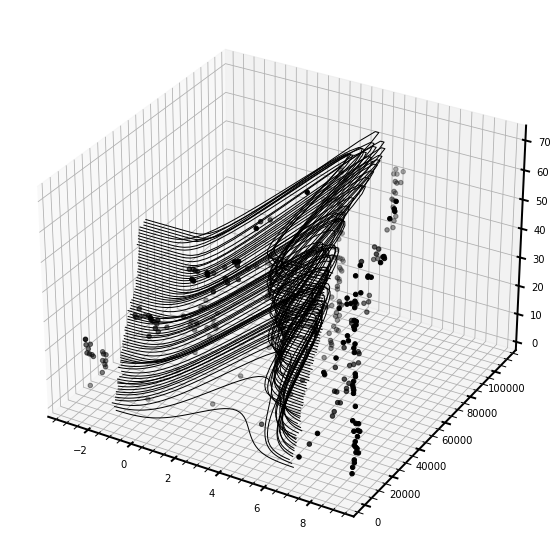

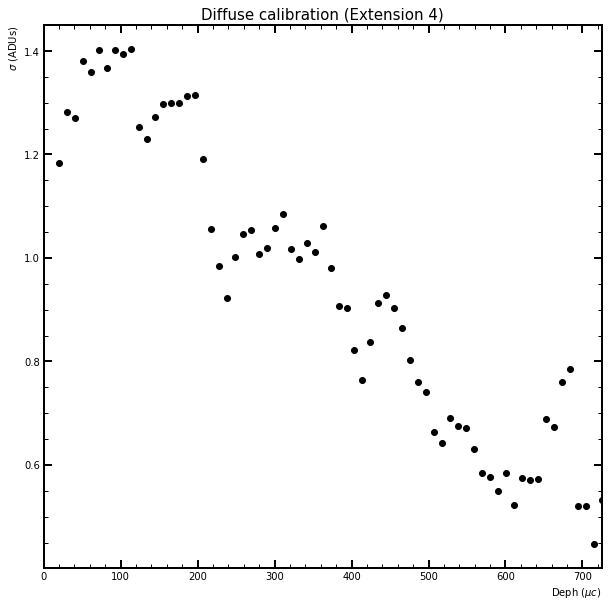

In [83]:
# fig_all, axs_all = plt.subplots(1, 2, figsize=(12, 6))
fig, axs_all = plt.subplots( subplot_kw={"projection": "3d"}, figsize = [10,10])
fig_2, axs_all_2 = plt.subplots(figsize = [10, 10])


# for label_event in (53, 87, 464, 700, 862, 909, 1166, 1610, 2769, 3224):

label_event = 11
event = matrix_ext_4_vertical[label_event]

# plt.imshow(event)
size_x = event.shape[1]
size_y = event.shape[0]

label_verticalMuon, nlabels_verticalMuon = ndimage.label(event,structure=[[0,0,0],[1,1,1],[0,0,0]])
print('n_labels: ', nlabels_verticalMuon)
# plt.imshow(label_verticalMuon == 13)
# plt.colorbar()
# plt.show()

list_sigmas = []
CCD_depth = 725
Delta_inicial = 2 # px
Delta_final = 6 # px

# fig_all, axs_all = plt.subplots(1, 2, figsize=(12, 6))
# fig, axs_all = plt.subplots( subplot_kw={"projection": "3d"}, figsize = [10,10])
lines = 0
Longitud_XY = size_y 

Z_inicial = (Delta_inicial * CCD_depth) / (Longitud_XY - Delta_final)


### Parte de abajo de la imagen ##
line = label_verticalMuon == Delta_inicial
# print(Delta_inicial)
loc = ndimage.find_objects(label_verticalMuon == Delta_inicial)[0]
mask_35 = np.invert(label_verticalMuon == Delta_inicial)
data_mask = ma.masked_array(event[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop], mask_35[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop])

# print(data_mask[0][0])
# print(np.arange(0, Longitud_linea, 1))

Longitud_linea = len(data_mask[0])
Carga_renglon = data_mask[0].sum()
Mean_carga = np.mean(data_mask[0])

Mean_in_1 = 0
var_1 = 0
carga_cuadrada = 0

# print(data_mask[0])
for pixel in np.arange(0, Longitud_linea, 1):
    if data_mask[0][pixel]:
        element_pixel = (pixel * data_mask[0][pixel]) / Carga_renglon
        Mean_in_1 = Mean_in_1 + element_pixel
    else:
        element_pixel = 0
    
    Mean_in_1 = Mean_in_1 + element_pixel

## Calcula la suma de las cargas al cuadrado ##
for pixel in np.arange(0, Longitud_linea, 1):
    if data_mask[0][pixel]:
        element_pixel = data_mask[0][pixel]**2
    else:
        element_pixel = 0
    carga_cuadrada = carga_cuadrada + element_pixel 

Mean_carga_cuadrada_1 = carga_cuadrada/Longitud_linea


for pixel in np.arange(0, Longitud_linea, 1):
    element_pixel =(1 / (Longitud_linea - 1)) * (pixel - Mean_in_1)**2
    var_1 = var_1 + element_pixel 

var_1_true = var_1 * (Mean_carga_cuadrada_1 / (Mean_carga**2))
# var_1_true = var_1

sigma_in = np.sqrt(var_1_true)


### Parte de arriba de la imagen ###
line = label_verticalMuon ==  nlabels_verticalMuon - Delta_final
# print( nlabels_verticalMuon - Delta_final)
loc = ndimage.find_objects(label_verticalMuon == nlabels_verticalMuon - Delta_final)[0]
mask_35 = np.invert(label_verticalMuon == nlabels_verticalMuon - Delta_final)
data_mask = ma.masked_array(event[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop], mask_35[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop])
# print(data_mask[0])

Longitud_linea = len(data_mask[0])
Carga_renglon = data_mask[0].sum()
Mean_carga = np.mean(data_mask[0])

Mean_in_2 = 0
var_2 = 0
carga_cuadrada = 0

for pixel in np.arange(0, Longitud_linea, 1):
    if data_mask[0][pixel]:
        element_pixel = (pixel * data_mask[0][pixel]) / Carga_renglon
    else:
        element_pixel = 0
    Mean_in_2 = Mean_in_2 + element_pixel
    # print('Valor mean: ', Mean_in_2)

## Calcula la suma de las cargas al cuadrado ##
for pixel in np.arange(0, Longitud_linea, 1):
    if data_mask[0][pixel]:
        element_pixel = data_mask[0][pixel]**2
    else:
        element_pixel = 0
    carga_cuadrada = carga_cuadrada + element_pixel 

Mean_carga_cuadrada_2 = carga_cuadrada / Longitud_linea

for pixel in np.arange(0, Longitud_linea, 1):
    element_pixel = (1 / (Longitud_linea - 1)) * (pixel - Mean_in_2)**2
    var_2 = var_2 + element_pixel

var_2_true = var_2 * (Mean_carga_cuadrada_2 / (Mean_carga**2))
# var_2_true = var_2

sigma_fn = np.sqrt(var_2_true)

print('Means: ', Mean_in_1, Mean_in_2)
print('Sigmas: ', sigma_in, sigma_fn)

if sigma_in > sigma_fn:
    turn_event = np.flip(event, 0)
    event = turn_event
    for lable_line in np.arange(Delta_inicial, nlabels_verticalMuon - Delta_final):
        ## Enmascara la linea en turno
        # print(nlabels_verticalMuon)
        line = label_verticalMuon == lable_line
        loc = ndimage.find_objects(label_verticalMuon == lable_line)[0]
        mask_35 = np.invert(label_verticalMuon == lable_line)
        data_mask = ma.masked_array(event[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop], mask_35[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop])

        Longitud_linea = len(data_mask[0])
        Carga_renglon = data_mask[0].sum()
        Mean_carga = np.mean(data_mask[0])

        Mean_in  = 0
        var = 0
        carga_cuadrada = 0

        ### SE calcula el X promedio ##
        for pixel in np.arange(0, Longitud_linea, 1):
            if data_mask[0][pixel]:
                element_pixel = (pixel * data_mask[0][pixel]) / Carga_renglon
                Mean_in = Mean_in + element_pixel
            else:
                element_pixel = 0
            
            Mean_in = Mean_in + element_pixel

        ## Calcula la suma de las cargas al cuadrado ##
        for pixel in np.arange(0, Longitud_linea, 1):
            if data_mask[0][pixel]:
                element_pixel = data_mask[0][pixel]**2
            else:
                element_pixel = 0
            carga_cuadrada = carga_cuadrada + element_pixel 

        Mean_carga_cuadrada = carga_cuadrada/Longitud_linea

        ### Se calcula la varianza y despues la sigma ##
        for pixel in np.arange(0, Longitud_linea, 1):
            element_pixel =(1 / (Longitud_linea - 1)) * (pixel - Mean_in_1)**2
            var = var + element_pixel  ### COreggir la varianza con otro estimados

        var_true = var * (Mean_carga_cuadrada / (Mean_carga**2))
        sigma = np.sqrt(var_true)
        

        ##Se crea un arreglo para usarlo en el plot de los datos, y se realiza el juste ##
        list_xlabel = np.arange(0.5, len(data_mask[0]), 1)

        list_xlabel_long = np.linspace(-Longitud_linea + int(Longitud_linea/2) , Longitud_linea + int(Longitud_linea/2), Longitud_linea)
        
        popt, pcov = curve_fit(gaussian, list_xlabel, data_mask[0], maxfev=100000, p0 = [1000,Mean_in,sigma])		# Fit histogram with gaussian

        dict_popt = {'Mean' : popt[1], 'Hight' : popt[0], 'sigma' : abs(popt[2]), 'Pcov' : pcov}
        Centroide = popt[1]
        Sigma = abs(popt[2])
        # print(Sigma)

        # if Sigma > 6:
        #     continue

        ## Se grafican los puntos experimentales ##
        axs_all.scatter(list_xlabel_long, data_mask[0], lable_line, '.', color = 'k')

        ## Se crea otro arreglo para el plot del ajusto y se dibuja ##
        list_xlabel_long = np.linspace( Centroide - 4 , Centroide + 4)
        
        axs_all.plot(list_xlabel_long, gaussian(list_xlabel_long, *popt), lable_line, 'k')	
        # axs_all.legend()

        # Se guarda la sigma de la distribución en una lista ##
        list_sigmas.append(Sigma)
        # list_all_sigmas.append(Sigma)
        # print('Centroide: ',popt[1], ' Amplitud: ', popt[0], 'sigma: ', abs(popt[2]))  #gaussian(x, a, mean, sigma)
        lines = lines + 1


if sigma_in < sigma_fn:
    for lable_line in np.arange(Delta_inicial, nlabels_verticalMuon - Delta_final):
        ## Enmascara la linea en turno
        # print(nlabels_verticalMuon)
        line = label_verticalMuon == lable_line
        loc = ndimage.find_objects(label_verticalMuon == lable_line)[0]
        mask_35 = np.invert(label_verticalMuon == lable_line)
        data_mask = ma.masked_array(event[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop], mask_35[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop])

        Longitud_linea = len(data_mask[0])
        Carga_renglon = data_mask[0].sum()
        Mean_carga = np.mean(data_mask[0])

        Mean_in  = 0
        var = 0
        carga_cuadrada = 0

        ### SE calcula el X promedio ##
        for pixel in np.arange(0, Longitud_linea, 1):
            if data_mask[0][pixel]:
                element_pixel = (pixel * data_mask[0][pixel]) / Carga_renglon
                Mean_in = Mean_in + element_pixel
            else:
                element_pixel = 0
            
            Mean_in = Mean_in + element_pixel

        ## Calcula la suma de las cargas al cuadrado ##
        for pixel in np.arange(0, Longitud_linea, 1):
            if data_mask[0][pixel]:
                element_pixel = data_mask[0][pixel]**2
            else:
                element_pixel = 0
            carga_cuadrada = carga_cuadrada + element_pixel 

        Mean_carga_cuadrada = carga_cuadrada/Longitud_linea

        ### Se calcula la varianza y despues la sigma ##
        for pixel in np.arange(0, Longitud_linea, 1):
            element_pixel =(1 / (Longitud_linea - 1)) * (pixel - Mean_in_1)**2
            var = var + element_pixel  ### COreggir la varianza con otro estimados

        var_true = var * (Mean_carga_cuadrada / (Mean_carga**2))
        sigma = np.sqrt(var_true)

        ##Se crea un arreglo para usarlo en el plot de los datos, y se realiza el juste ##
        list_xlabel = np.arange(0.5, len(data_mask[0]), 1)

        list_xlabel_long = np.linspace(-Longitud_linea + int(Longitud_linea/2) , Longitud_linea + int(Longitud_linea/2), Longitud_linea)
        
        popt, pcov = curve_fit(gaussian, list_xlabel, data_mask[0], maxfev=100000, p0 = [1,Mean_in,sigma])		# Fit histogram with gaussian

        dict_popt = {'Mean' : popt[1], 'Hight' : popt[0], 'sigma' : abs(popt[2]), 'Pcov' : pcov}
        Centroide = popt[1]
        Sigma = abs(popt[2])
        # print(Sigma)

        # if Sigma > 6:
        #     continue

        ## Se grafican los puntos experimentales ##
        axs_all.scatter(list_xlabel_long, data_mask[0], lable_line, '.', color = 'k')

        ## Se crea otro arreglo para el plot del ajusto y se dibuja ##
        list_xlabel_long = np.linspace( Centroide - 4 , Centroide + 4)
        
        axs_all.plot(list_xlabel_long, gaussian(list_xlabel_long, *popt), lable_line, 'k')	
        # axs_all.legend()

        # Se guarda la sigma de la distribución en una lista ##
        list_sigmas.append(Sigma)
        # list_all_sigmas.append(Sigma)
        # print('Centroide: ',popt[1], ' Amplitud: ', popt[0], 'sigma: ', abs(popt[2]))  #gaussian(x, a, mean, sigma)
        lines = lines + 1



# all_lines = len(list_sigmas)
all_lines = lines
print('Num_sig: ', len(list_sigmas))
# print(len(list_sigmas))
# all_lines = np.arange(5, nlabels_verticalMuon - 1)

# delta_depth = CCD_depth/lines

# print(list_sigmas)
# list_xlabel_sigmas = np.arange(0, CCD_depth, delta_depth)
# axs_all_2[0].scatter(list_xlabel_sigmas, list_sigmas, marker='.', color='k')#, label = 'Muon: ' + str(n_muon))
# n_muon = n_muon + 1



# print(list_sigmas)

# popt_DM, pcov_DM = curve_fit(diffution_curve, array_x, list_all_sigmas, maxfev=100000)
# dict_diffution_model = {'Alpha' : popt_DM[0], 'Beta' : popt_DM[1]}

# axs_all.plot(list_xlabel_long, gaussian(list_xlabel_long, *popt), lable_line, k')
# axs_all.plot(array_x, diffution_curve(array_x, *popt_DM), 'g-', label = 'Ajuste')

list_xlabel_sigmas = np.linspace(Z_inicial, CCD_depth, len(list_sigmas))
print(len(list_xlabel_sigmas))

# ¿¿
axs_all_2.scatter(list_xlabel_sigmas, list_sigmas, marker='o', color='k')#, label = 'Muon: ' + str(n_muon))

axs_all_2.set_title('Diffuse calibration (Extension 4)', size = 15)#, y=0.92)}
axs_all_2.set_ylabel(r'$\sigma$ (ADUs)')
axs_all_2.set_xlabel(r'Deph ($\mu c$)')
axs_all_2.set_xlim(0, 725)
axs_all.grid()

plt.show()


# for lable_line in range(1, nlabels_verticalMuon):
#     line = label_verticalMuon == lable_line
#     loc = ndimage.find_objects(label_verticalMuon == lable_line)[0]
#     mask_35 = np.invert(label_verticalMuon == lable_line)
#     data_mask = ma.masked_array(event[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop], mask_35[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop])
#     # plt.imshow(data_mask)
#     print(data_mask.mask)
#     # charge = data_mask.sum()
    # mean_charge = data_mask.mean()


## Gráfica de sigmas de distintos muones

ValueError: x and y must be the same size

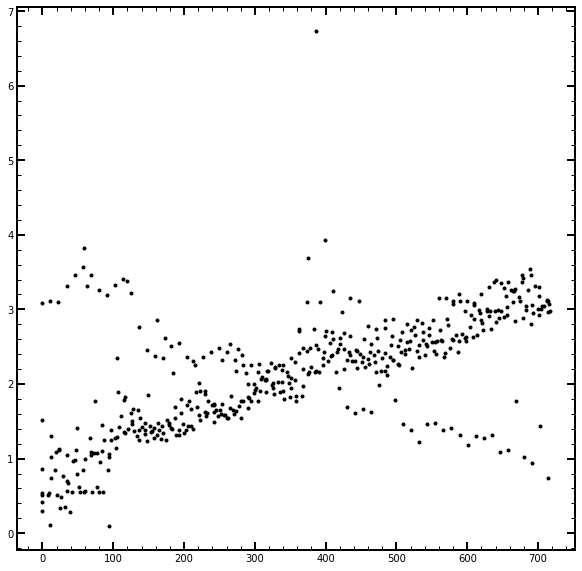

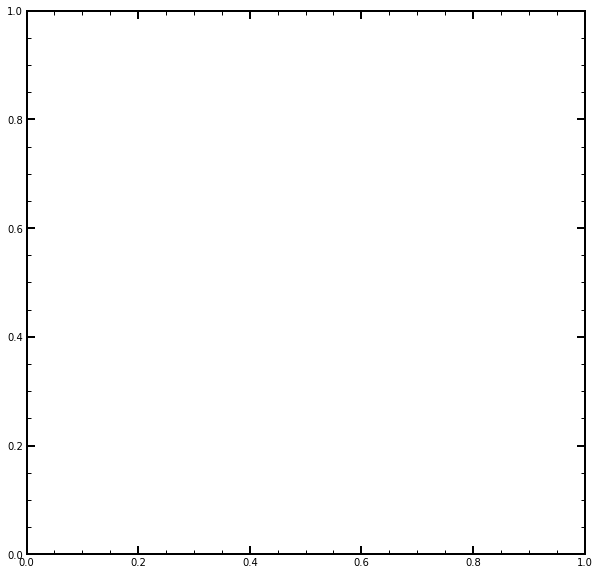

In [131]:
fig_2, axs_all_2 = plt.subplots(figsize = [10, 10])
fig, axs_all = plt.subplots(figsize = [10, 10])
n_muon = 0
CCD_depth = 725 #micras


list_all_sigmas = []
# for label_event in (131, 508, 686, 1166, 1610, 2769, 3224, 3493):

# for label_event in (53, 1166, 1610, 2769, 3224):
#     event = matrix_ext_1_vertical[label_event]

#     # plt.imshow(event)
#     size_x = event.shape[1]
#     size_y = event.shape[0]

#     label_verticalMuon, nlabels_verticalMuon = ndimage.label(event,structure=[[0,0,0],[1,1,1],[0,0,0]])

#     # plt.imshow(label_verticalMuon == 13)
#     # plt.colorbar()
#     # plt.show()

#     list_sigmas = []

#     # fig_all, axs_all = plt.subplots(1, 2, figsize=(12, 6))
#     # fig, axs_all = plt.subplots( subplot_kw={"projection": "3d"}, figsize = [10,10])

#     for lable_line in np.arange(1, nlabels_verticalMuon - 1):

#         ## Enmascara la linea en turno
#         # print(nlabels_verticalMuon)
#         line = label_verticalMuon == lable_line
#         loc = ndimage.find_objects(label_verticalMuon == lable_line)[0]
#         mask_35 = np.invert(label_verticalMuon == lable_line)
#         data_mask = ma.masked_array(event[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop], mask_35[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop])
#         # print(data_mask[0])

#         ## Se obtiene su longitud ##
#         Longitud_linea = len(data_mask[0])

#         # if label_event == 3224:
#         #     print(Longitud_linea, )

#         ##Se crea un arreglo para usarlo en el plot de los datos, y se realiza el juste ##
#         list_xlabel_long = np.linspace(-Longitud_linea + int(Longitud_linea/2) , Longitud_linea + int(Longitud_linea/2), Longitud_linea)
#         popt, pcov = curve_fit(gaussian, list_xlabel_long, data_mask[0], maxfev=100000)#, p0 = [1,1,1])		# Fit histogram with gaussian

#         dict_popt = {'Mean' : popt[1], 'Hight' : popt[0], 'sigma' : abs(popt[2]), 'Pcov' : pcov}
#         # Centroide = popt[1]
#         Sigma = abs(popt[2])
#         # print(Sigma)

#         if Sigma > 20:
#             continue

#         ## Se grafican los puntos experimentales ##
#         # axs_all.scatter(list_xlabel, data_mask[0], lable_line, 'o')

#         ## Se crea otro arreglo para el plot del ajusto y se dibuja ##
#         # list_xlabel_long = np.linspace( Centroide - 4 , Centroide + 4)
#         # axs_all.plot(list_xlabel_long, gaussian(list_xlabel_long, *popt), lable_line, 'k')	
#         # axs_all.legend()

#         # Se guarda la sigma de la distribución en una lista ##
#         list_sigmas.append(Sigma)
#         list_all_sigmas.append(Sigma)
#         # print('Centroide: ',popt[1], ' Amplitud: ', popt[0], 'sigma: ', abs(popt[2]))  #gaussian(x, a, mean, sigma)

#     all_lines = len(list_sigmas)

#     delta_depth = CCD_depth/all_lines

#     # print(list_sigmas)
#     list_xlabel_sigmas = np.arange(0, CCD_depth, delta_depth)
#     axs_all_2.scatter(list_xlabel_sigmas, list_sigmas, marker='.', color='k')#, label = 'Muon: ' + str(n_muon))
#     n_muon = n_muon + 1


# for label_event in (77, 1911, 2381, 2930):
#     event = matrix_ext_4_vertical[label_event]

#     # plt.imshow(event)
#     size_x = event.shape[1]
#     size_y = event.shape[0]

#     label_verticalMuon, nlabels_verticalMuon = ndimage.label(event,structure=[[0,0,0],[1,1,1],[0,0,0]])

#     # plt.imshow(label_verticalMuon == 13)
#     # plt.colorbar()
#     # plt.show()

#     list_sigmas = []

#     # fig_all, axs_all = plt.subplots(1, 2, figsize=(12, 6))
#     # fig, axs_all = plt.subplots( subplot_kw={"projection": "3d"}, figsize = [10,10])

#     for lable_line in np.arange(1, nlabels_verticalMuon-1):

#         ## Enmascara la linea en turno
#         # print(nlabels_verticalMuon)
#         line = label_verticalMuon == lable_line
#         loc = ndimage.find_objects(label_verticalMuon == lable_line)[0]
#         mask_35 = np.invert(label_verticalMuon == lable_line)
#         data_mask = ma.masked_array(event[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop], mask_35[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop])
#         # print(data_mask[0])

#         ## Se obtiene su longitud ##
#         Longitud_linea = len(data_mask[0])

#         # if label_event == 3224:
#         #     print(Longitud_linea, )

#         ##Se crea un arreglo para usarlo en el plot de los datos, y se realiza el juste ##
#         list_xlabel_long = np.linspace(-Longitud_linea + int(Longitud_linea/2) , Longitud_linea + int(Longitud_linea/2), Longitud_linea)
#         popt, pcov = curve_fit(gaussian, list_xlabel_long, data_mask[0], maxfev=100000)#, p0 = [1,1,1])		# Fit histogram with gaussian

#         dict_popt = {'Mean' : popt[1], 'Hight' : popt[0], 'sigma' : abs(popt[2]), 'Pcov' : pcov}
#         # Centroide = popt[1]
#         Sigma = abs(popt[2])
#         # print(Sigma)

#         if Sigma > 20:
#             continue

#         ## Se grafican los puntos experimentales ##
#         # axs_all.scatter(list_xlabel, data_mask[0], lable_line, 'o')

#         ## Se crea otro arreglo para el plot del ajusto y se dibuja ##
#         # list_xlabel_long = np.linspace( Centroide - 4 , Centroide + 4)'
#         # axs_all.plot(list_xlabel_long, gaussian(list_xlabel_long, *popt), lable_line, k')	
#         # axs_all.legend()

#         # Se guarda la sigma de la distribución en una lista ##
#         list_sigmas.append(Sigma)
#         list_all_sigmas.append(Sigma)
#         # print('Centroide: ',popt[1], ' Amplitud: ', popt[0], 'sigma: ', abs(popt[2]))  #gaussian(x, a, mean, sigma)

#     all_lines = len(list_sigmas)

#     delta_depth = CCD_depth/all_lines

#     # print(list_sigmas)
#     list_xlabel_sigmas = np.arange(0, CCD_depth, delta_depth)
#     axs_all_2.scatter(list_xlabel_sigmas, list_sigmas, marker='.', color='k')
#     n_muon = n_muon + 1


# for label_event in (56, 107, 335, 587, 1206, 1454, 1926):
for label_event in (5, 6, 11, 20, 27, 30, 71, 72, 79, 83, 85, 92, 96, 97):
    event = matrix_ext_4_vertical[label_event]

    # plt.imshow(event)
    size_x = event.shape[1]
    size_y = event.shape[0]

    label_verticalMuon, nlabels_verticalMuon = ndimage.label(event,structure=[[0,0,0],[1,1,1],[0,0,0]])

    # plt.imshow(label_verticalMuon == 13)
    # plt.colorbar()
    # plt.show()

    list_sigmas = []

    # fig_all, axs_all = plt.subplots(1, 2, figsize=(12, 6))
    # fig, axs_all = plt.subplots( subplot_kw={"projection": "3d"}, figsize = [10,10])

    for lable_line in np.arange(1, nlabels_verticalMuon-1):

        ## Enmascara la linea en turno
        # print(nlabels_verticalMuon)
        line = label_verticalMuon == lable_line
        loc = ndimage.find_objects(label_verticalMuon == lable_line)[0]
        mask_35 = np.invert(label_verticalMuon == lable_line)
        data_mask = ma.masked_array(event[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop], mask_35[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop])
        # print(data_mask[0])

        ## Se obtiene su longitud ##
        Longitud_linea = len(data_mask[0])

        # if label_event == 3224:
        #     print(Longitud_linea, )
        list_xlabel = 
        ##Se crea un arreglo para usarlo en el plot de los datos, y se realiza el juste ##
        list_xlabel_long = np.linspace(-Longitud_linea + int(Longitud_linea/2) , Longitud_linea + int(Longitud_linea/2), Longitud_linea)
        popt, pcov = curve_fit(gaussian, list_xlabel_long, data_mask[0], maxfev=100000)#, p0 = [1,1,1])		# Fit histogram with gaussian

        dict_popt = {'Mean' : popt[1], 'Hight' : popt[0], 'sigma' : abs(popt[2]), 'Pcov' : pcov}
        # Centroide = popt[1]
        Sigma = abs(popt[2])
        # print(Sigma)

        if Sigma > 20:
            continue

        ## Se grafican los puntos experimentales ##
        # axs_all.scatter(list_xlabel, data_mask[0], lable_line, 'o')

        ## Se crea otro arreglo para el plot del ajusto y se dibuja ##
        # list_xlabel_long = np.linspace( Centroide - 4 , Centroide + 4)'
        # axs_all.plot(list_xlabel_long, gaussian(list_xlabel_long, *popt), lable_line, k')	
        # axs_all.legend()

        # Se guarda la sigma de la distribución en una lista ##
        list_sigmas.append(Sigma)
        list_all_sigmas.append(Sigma)
        # print('Centroide: ',popt[1], ' Amplitud: ', popt[0], 'sigma: ', abs(popt[2]))  #gaussian(x, a, mean, sigma)

    all_lines = len(list_sigmas)

    delta_depth = CCD_depth/all_lines

    # print(list_sigmas)
    list_xlabel_sigmas = np.arange(0, CCD_depth, delta_depth)
    axs_all_2.scatter(list_xlabel_sigmas, list_sigmas, marker='.', color='k')
    n_muon = n_muon + 1


Logntidud_all_sigmas = len(list_all_sigmas)

array_x = np.linspace(0, Logntidud_all_sigmas, Logntidud_all_sigmas)

popt_DM, pcov_DM = curve_fit(diffution_curve, array_x, list_all_sigmas, maxfev=100000)
dict_diffution_model = {'Alpha' : popt_DM[0], 'Beta' : popt_DM[1]}

# axs_all.plot(list_xlabel_long, gaussian(list_xlabel_long, *popt), lable_line, k')
axs_all.plot(array_x, diffution_curve(array_x, *popt_DM), 'g-', label = 'Ajuste')

axs_all_2.legend()
fig_2.suptitle('Modelo de Difusión ( con ' + str(n_muon) + ' muones)',  size = 20, y=0.92 )
axs_all_2.set_ylabel(r'$\sigma$ (ADUs)')
axs_all_2.set_xlabel('Pixel')
plt.show()

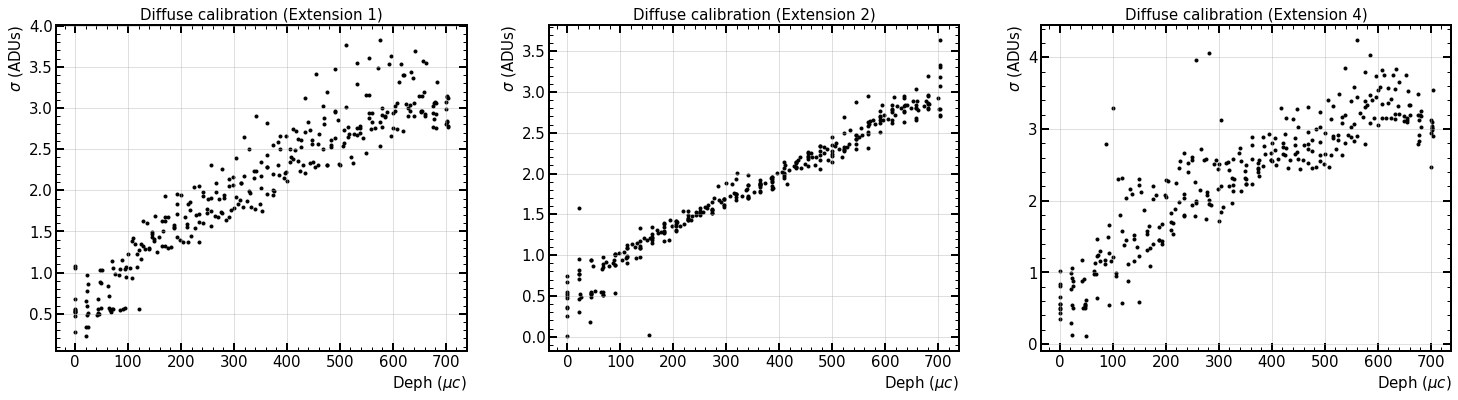

In [529]:
fig_2, axs_all_2 = plt.subplots(1,3,figsize = [25, 6])
# fig, axs_all = plt.subplots(figsize = [10, 10])
n_muon = 0
CCD_depth = 725 #micras


list_all_sigmas = []
# for label_event in (131, 508, 686, 1166, 1610, 2769, 3224, 3493):

for label_event in (53, 87, 464, 700, 862, 909, 1166, 1610, 2769, 3224):
    event = matrix_ext_1_vertical[label_event]

    # plt.imshow(event)
    size_x = event.shape[1]
    size_y = event.shape[0]

    label_verticalMuon, nlabels_verticalMuon = ndimage.label(event,structure=[[0,0,0],[1,1,1],[0,0,0]])

    # plt.imshow(label_verticalMuon == 13)
    # plt.colorbar()
    # plt.show()

    list_sigmas = []

    # fig_all, axs_all = plt.subplots(1, 2, figsize=(12, 6))
    # fig, axs_all = plt.subplots( subplot_kw={"projection": "3d"}, figsize = [10,10])

    for lable_line in np.arange(1, nlabels_verticalMuon - 1):

        ## Enmascara la linea en turno
        # print(nlabels_verticalMuon)
        line = label_verticalMuon == lable_line
        loc = ndimage.find_objects(label_verticalMuon == lable_line)[0]
        mask_35 = np.invert(label_verticalMuon == lable_line)
        data_mask = ma.masked_array(event[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop], mask_35[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop])
        # print(data_mask[0])

        ## Se obtiene su longitud ##
        Longitud_linea = len(data_mask[0])

        # if label_event == 3224:
        #     print(Longitud_linea, )

        ##Se crea un arreglo para usarlo en el plot de los datos, y se realiza el juste ##
        list_xlabel_long = np.linspace(-Longitud_linea + int(Longitud_linea/2) , Longitud_linea + int(Longitud_linea/2), Longitud_linea)
        popt, pcov = curve_fit(gaussian, list_xlabel_long, data_mask[0], maxfev=100000)#, p0 = [1,1,1])		# Fit histogram with gaussian

        dict_popt = {'Mean' : popt[1], 'Hight' : popt[0], 'sigma' : abs(popt[2]), 'Pcov' : pcov}
        # Centroide = popt[1]
        Sigma = abs(popt[2])
        # print(Sigma)

        if Sigma > 20:
            continue

        ## Se grafican los puntos experimentales ##
        # axs_all.scatter(list_xlabel, data_mask[0], lable_line, 'o')

        ## Se crea otro arreglo para el plot del ajusto y se dibuja ##
        # list_xlabel_long = np.linspace( Centroide - 4 , Centroide + 4)
        # axs_all.plot(list_xlabel_long, gaussian(list_xlabel_long, *popt), lable_line, 'k')	
        # axs_all.legend()

        # Se guarda la sigma de la distribución en una lista ##
        list_sigmas.append(Sigma)
        list_all_sigmas.append(Sigma)
        # print('Centroide: ',popt[1], ' Amplitud: ', popt[0], 'sigma: ', abs(popt[2]))  #gaussian(x, a, mean, sigma)

    all_lines = len(list_sigmas)

    delta_depth = CCD_depth/all_lines

    # print(list_sigmas)
    list_xlabel_sigmas = np.arange(0, CCD_depth, delta_depth)
    axs_all_2[0].scatter(list_xlabel_sigmas, list_sigmas, marker='.', color='k')#, label = 'Muon: ' + str(n_muon))
    n_muon = n_muon + 1


for label_event in (56, 107, 133, 335, 587, 821, 884, 1206, 1454, 1926):
    event = matrix_ext_2_vertical[label_event]

    # plt.imshow(event)
    size_x = event.shape[1]
    size_y = event.shape[0]

    label_verticalMuon, nlabels_verticalMuon = ndimage.label(event,structure=[[0,0,0],[1,1,1],[0,0,0]])

    # plt.imshow(label_verticalMuon == 13)
    # plt.colorbar()
    # plt.show()

    list_sigmas = []

    # fig_all, axs_all = plt.subplots(1, 2, figsize=(12, 6))
    # fig, axs_all = plt.subplots( subplot_kw={"projection": "3d"}, figsize = [10,10])

    for lable_line in np.arange(1, nlabels_verticalMuon-1):

        ## Enmascara la linea en turno
        # print(nlabels_verticalMuon)
        line = label_verticalMuon == lable_line
        loc = ndimage.find_objects(label_verticalMuon == lable_line)[0]
        mask_35 = np.invert(label_verticalMuon == lable_line)
        data_mask = ma.masked_array(event[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop], mask_35[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop])
        # print(data_mask[0])

        ## Se obtiene su longitud ##
        Longitud_linea = len(data_mask[0])

        # if label_event == 3224:
        #     print(Longitud_linea, )

        ##Se crea un arreglo para usarlo en el plot de los datos, y se realiza el juste ##
        list_xlabel_long = np.linspace(-Longitud_linea + int(Longitud_linea/2) , Longitud_linea + int(Longitud_linea/2), Longitud_linea)
        popt, pcov = curve_fit(gaussian, list_xlabel_long, data_mask[0], maxfev=100000)#, p0 = [1,1,1])		# Fit histogram with gaussian

        dict_popt = {'Mean' : popt[1], 'Hight' : popt[0], 'sigma' : abs(popt[2]), 'Pcov' : pcov}
        # Centroide = popt[1]
        Sigma = abs(popt[2])
        # print(Sigma)

        if Sigma > 20:
            continue

        ## Se grafican los puntos experimentales ##
        # axs_all.scatter(list_xlabel, data_mask[0], lable_line, 'o')

        ## Se crea otro arreglo para el plot del ajusto y se dibuja ##
        # list_xlabel_long = np.linspace( Centroide - 4 , Centroide + 4)'
        # axs_all.plot(list_xlabel_long, gaussian(list_xlabel_long, *popt), lable_line, k')	
        # axs_all.legend()

        # Se guarda la sigma de la distribución en una lista ##
        list_sigmas.append(Sigma)
        list_all_sigmas.append(Sigma)
        # print('Centroide: ',popt[1], ' Amplitud: ', popt[0], 'sigma: ', abs(popt[2]))  #gaussian(x, a, mean, sigma)

    all_lines = len(list_sigmas)

    delta_depth = CCD_depth/all_lines

    # print(list_sigmas)
    list_xlabel_sigmas = np.arange(0, CCD_depth, delta_depth)
    axs_all_2[1].scatter(list_xlabel_sigmas, list_sigmas, marker='.', color='k')
    n_muon = n_muon + 1


for label_event in (3, 31, 77, 617, 660, 792, 862, 1911, 2381, 2930):
    event = matrix_ext_4_vertical[label_event]

    # plt.imshow(event)
    size_x = event.shape[1]
    size_y = event.shape[0]

    label_verticalMuon, nlabels_verticalMuon = ndimage.label(event,structure=[[0,0,0],[1,1,1],[0,0,0]])

    # plt.imshow(label_verticalMuon == 13)
    # plt.colorbar()
    # plt.show()

    list_sigmas = []

    # fig_all, axs_all = plt.subplots(1, 2, figsize=(12, 6))
    # fig, axs_all = plt.subplots( subplot_kw={"projection": "3d"}, figsize = [10,10])

    for lable_line in np.arange(1, nlabels_verticalMuon-1):

        ## Enmascara la linea en turno
        # print(nlabels_verticalMuon)
        line = label_verticalMuon == lable_line
        loc = ndimage.find_objects(label_verticalMuon == lable_line)[0]
        mask_35 = np.invert(label_verticalMuon == lable_line)
        data_mask = ma.masked_array(event[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop], mask_35[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop])
        # print(data_mask[0])

        ## Se obtiene su longitud ##
        Longitud_linea = len(data_mask[0])

        # if label_event == 3224:
        #     print(Longitud_linea, )

        ##Se crea un arreglo para usarlo en el plot de los datos, y se realiza el juste ##
        list_xlabel_long = np.linspace(-Longitud_linea + int(Longitud_linea/2) , Longitud_linea + int(Longitud_linea/2), Longitud_linea)
        popt, pcov = curve_fit(gaussian, list_xlabel_long, data_mask[0], maxfev=100000)#, p0 = [1,1,1])		# Fit histogram with gaussian

        dict_popt = {'Mean' : popt[1], 'Hight' : popt[0], 'sigma' : abs(popt[2]), 'Pcov' : pcov}
        # Centroide = popt[1]
        Sigma = abs(popt[2])
        # print(Sigma)

        if Sigma > 20:
            continue

        ## Se grafican los puntos experimentales ##
        # axs_all.scatter(list_xlabel, data_mask[0], lable_line, 'o')

        ## Se crea otro arreglo para el plot del ajusto y se dibuja ##
        # list_xlabel_long = np.linspace( Centroide - 4 , Centroide + 4)'
        # axs_all.plot(list_xlabel_long, gaussian(list_xlabel_long, *popt), lable_line, k')	
        # axs_all.legend()

        # Se guarda la sigma de la distribución en una lista ##
        list_sigmas.append(Sigma)
        list_all_sigmas.append(Sigma)
        # print('Centroide: ',popt[1], ' Amplitud: ', popt[0], 'sigma: ', abs(popt[2]))  #gaussian(x, a, mean, sigma)

    all_lines = len(list_sigmas)

    delta_depth = CCD_depth/all_lines

    # print(list_sigmas)
    list_xlabel_sigmas = np.arange(0, CCD_depth, delta_depth)
    axs_all_2[2].scatter(list_xlabel_sigmas, list_sigmas, marker='.', color='k')
    n_muon = n_muon + 1


Logntidud_all_sigmas = len(list_all_sigmas)

array_x = np.linspace(0, Logntidud_all_sigmas, Logntidud_all_sigmas)

# popt_DM, pcov_DM = curve_fit(diffution_curve, array_x, list_all_sigmas, maxfev=100000)
# dict_diffution_model = {'Alpha' : popt_DM[0], 'Beta' : popt_DM[1]}

# # axs_all.plot(list_xlabel_long, gaussian(list_xlabel_long, *popt), lable_line, k')
# axs_all.plot(array_x, diffution_curve(array_x, *popt_DM), 'g-', label = 'Ajuste')

# axs_all_2.legend()
# fig_2.suptitle('Modelo de Difusión ( con ' + str(n_muon) + ' muones)',  size = 20, y=0.92 )
axs_all_2[0].set_title('Diffuse calibration (Extension 1)', size = 15)#, y=0.92)}
axs_all_2[1].set_title('Diffuse calibration (Extension 2)', size = 15)#, y=0.92)
axs_all_2[2].set_title('Diffuse calibration (Extension 4)', size = 15)#, y=0.92)

axs_all_2[0].set_ylabel(r'$\sigma$ (ADUs)')
axs_all_2[0].set_xlabel(r'Deph ($\mu c$)')
axs_all_2[0].grid()

axs_all_2[1].set_ylabel(r'$\sigma$ (ADUs)')
axs_all_2[1].set_xlabel(r'Deph ($\mu c$)')
axs_all_2[1].grid()

axs_all_2[2].set_ylabel(r'$\sigma$ (ADUs)')
axs_all_2[2].set_xlabel(r'Deph ($\mu c$)')
axs_all_2[2].grid()

plt.show()

# Visualizar Muones en PDF de una sola extensión y tipo

In [48]:
sample_horizontal = []
for index in (3, 31, 77, 617, 660, 792, 862, 1911, 2381, 2930):
    sample_horizontal.append(matrix_ext_4_vertical[index])

In [20]:
list_path = path.split('_')
print(list_path)
Elip_value = float(list_path[12])
Solidit_value = float(list_path[14])
Charge_units = list_path[15]

['/home/bruce/Documents/Programas/Catalogo', 'Eventos/dict', '', 'straight', 'muons', 'Extensions', '1', 'to', '4', 'Imgs', '2078', 'Elip', '0', 'Sol', '0.7', 'ADUs', '', '.pkl']


In [49]:
### Nombre del PDF ###
extension = 4
list_path = path.split('_')
Elip_value = float(list_path[12])
Solidit_value = float(list_path[14])
Charge_units = list_path[15]

PDF_images_name = "Muones-Verticales_Ext_" + str(extension) + "_Elip_" + str(Elip_value) + "_Sol_" + str(Solidit_value) + '_Units_' + str(Charge_units) + '.pdf' 
# PDF_images_name = 
# PDF_images_name = "Muones-Horizontales_Ext_" + str(extension) + "_Elip_" + str(Elip_value) + "_Sol_" + str(Solidit_value) + '_Units_' + str(Charge_units) + '.pdf' 

### Creación del PDF con el nombre ##
c = canvas.Canvas(PDF_images_name)

### Imagen provicional ###
path_image = 'Perfil_Muon.jpg'
color_matrix = [0.4, 0.4470, 0.2410]
# list_n_vertical = []
# list_n_events = []

n_events = 0
coord3x3 = [[0,0],[0,1], [0,2], [1,0], [1,1], [1,2], [2,0], [2,1], [2,2]]
fig, axs = plt.subplots(ncols= 3, nrows= 3, figsize = [10,10], facecolor = color_matrix) ## Las hojas tendrán 9 muones
w, h = A4 ## dimensiones del formato
num_pages = 0
c.showPage()
n_last_events = 0

# for extension in (1,2,4):
c.drawString(50, h - 50, 'Extensión ' + str(extension)) 
# n_vertical = len(dict_muons_true['extension_' +str(extension)]['Vertical_Events'])
n_vertical = len(sample_horizontal)
# n_vertical = len(data_histogram['extension_' + str(extension)]['Horizontal_Events']) + len(data_histogram['extension_' + str(extension)]['Vertical_Events'])
n_last_events = 0
n_events = 0
# print(n_vertical % 9 != 0)

if (n_vertical%9) == 0:
    # for event in dict_muons_true['extension_' +str(extension)]['Vertical_Events']:
    for event in sample_horizontal:
        n_vertical = n_vertical - 1
        n_events = n_events + 1
        # list_n_vertical.append(n_vertical)
        # list_n_events.append(n_events)
        # print('n_events: ', n_events)
        # print('n_vertical: ', n_vertical)

        # print('n_vertical: ', n_vertical)
        if n_events < 10: 
            # print('n_events: ', n_events)
            charge = event.sum()
            axs[coord3x3[n_events - 1][0],coord3x3[n_events - 1][1]].imshow(event)
            axs[coord3x3[n_events - 1][0],coord3x3[n_events - 1][1]].set_ylabel('Charge: ' + str(charge))

            if n_events == 9:
                n_events = 10

        if n_events == 10:
            n_events = 0
            num_pages = num_pages + 1
            fig.savefig(path_image)
            img = ImageReader(path_image)

            # Obtener el ancho y alto de la imagen.
            img_w, img_h = img.getSize()

            # h - img_h es el alto de la hoja menos el alto de la imagen.
            c.drawImage(img, w - img_w + 50, h - img_h - 60)
            c.drawString(w/2, 40, str(num_pages))
            c.showPage()
            # plt.imshow(event)
            # plt.show()
            plt.close()
            ! rm Perfil_Muon.jpg

            fig, axs = plt.subplots(ncols= 3, nrows= 3, figsize = [10,10], facecolor = color_matrix)

if (n_vertical%9) != 0:
    Resto = n_vertical%9
    # for event in dict_muons_true['extension_' +str(extension)]['Vertical_Events']:
    for event in sample_horizontal:
        n_vertical = n_vertical - 1
        n_events = n_events + 1
        # list_n_vertical.append(n_vertical)
        # list_n_events.append(n_events)
        # print('n_events: ', n_events)
        # print('n_vertical: ', n_vertical)

        if n_vertical >= Resto:
            # print('n_vertical: ', n_vertical)
            if n_events < 10: 
                # print('n_events: ', n_events)
                charge = event.sum()
                axs[coord3x3[n_events - 1][0],coord3x3[n_events - 1][1]].imshow(event)
                axs[coord3x3[n_events - 1][0],coord3x3[n_events - 1][1]].set_ylabel('Charge: ' + str(charge))
                if n_events == 9:
                    n_events = 10

            if n_events == 10:
                n_events = 0
                num_pages = num_pages + 1
                fig.savefig(path_image)
                img = ImageReader(path_image)

                # Obtener el ancho y alto de la imagen.
                img_w, img_h = img.getSize()

                # h - img_h es el alto de la hoja menos el alto de la imagen.
                c.drawImage(img, w - img_w + 50, h - img_h - 60)
                c.drawString(w/2, 40, str(num_pages) + '.a')
                c.showPage()
                # plt.imshow(event)
                # plt.show()
                plt.close()
                ! rm Perfil_Muon.jpg

                fig, axs = plt.subplots(ncols= 3, nrows= 3, figsize = [10,10], facecolor = color_matrix)

        if  n_vertical < Resto:
            n_last_events = n_last_events + 1
            # fig, axs = plt.subplots(ncols= 3, nrows= 3, figsize = [10,10], facecolor = [0, 0.4470, 0.7410])
            # print('n_vertical: ', n_vertical)
            # print('n_last_events: ', n_last_events)
            charge = event.sum()
            axs[coord3x3[n_last_events - 1][0],coord3x3[n_last_events - 1][1]].imshow(event)
            axs[coord3x3[n_last_events - 1][0],coord3x3[n_last_events - 1][1]].set_xlabel('Charge: ' + str(charge))

            if n_vertical == 0:
                # plt.show()
                num_pages = num_pages + 1
                fig.savefig(path_image)
                img = ImageReader(path_image)

                # Obtener el ancho y alto de la imagen.
                img_w, img_h = img.getSize()

                # h - img_h es el alto de la hoja menos el alto de la imagen.
                c.drawImage(img, w - img_w + 50, h - img_h - 60)
                c.drawString(w/2, 40, str(num_pages))
                c.showPage()
                # plt.imshow(event)
                # plt.show()
                plt.close()
                ! rm Perfil_Muon.jpg

                fig, axs = plt.subplots(ncols= 3, nrows= 3, figsize = [10,10], facecolor = color_matrix)




plt.close()
c.save()

## Visualizar en PDF TODOS los muones encontrados 

In [33]:
##### SOLO CORRER ESTA CELDA SI EL NÚMERO DE EVENTOS NO ES MUY GRANDE O EL PROCESO SERÁ DEMASIADO TARDADO #####

### Nombre del PDF ###
# extension = 1
list_path = path.split('_')
Elip_value = float(list_path[12])
Solidit_value = float(list_path[14])
Charge_units = list_path[15]

color_matrix = [0.6, 0.4470, 0.2410]

PDF_images_name = "Muones-Rectos_Elip_" + str(Elip_value) + "_Sol_" + str(Solidit_value) + '_Units_' + str(Charge_units) + '.pdf' 

### Creación del PDF con el nombre ##
c = canvas.Canvas(PDF_images_name)

### Imagen provicional ###
path_image = 'Perfil_Muon.jpg'
num_pages = 0

# list_n_vertical = []
# list_n_events = []
for extension in (1,2,4):
    coord3x3 = [[0,0],[0,1], [0,2], [1,0], [1,1], [1,2], [2,0], [2,1], [2,2]]
    fig, axs = plt.subplots(ncols= 3, nrows= 3, figsize = [10,10], facecolor = color_matrix) ## Las hojas tendrán 9 muones
    w, h = A4 ## dimensiones del formato
    c.showPage()

    # for extension in (1,2,4):
    c.drawString(50, h - 50, 'Extensión ' + str(extension)) 
    # n_vertical = len(dict_muons_true['extension_' +str(extension)]['Vertical_Events'])
    n_vertical = len(data_histogram['extension_' + str(extension)]['Vertical_Events'])
    n_horizontal = len(data_histogram['extension_' + str(extension)]['Horizontal_Events'])

    # n_vertical = len(data_histogram['extension_' + str(extension)]['Horizontal_Events']) + len(data_histogram['extension_' + str(extension)]['Vertical_Events'])
    n_last_events = 0
    n_events = 0
    # print(n_vertical % 9 != 0)

    if (n_vertical%9) == 0:
        # for event in dict_muons_true['extension_' +str(extension)]['Vertical_Events']:
        for event in data_histogram['extension_' + str(extension)]['Vertical_Events']:
            n_vertical = n_vertical - 1
            n_events = n_events + 1
            # list_n_vertical.append(n_vertical)
            # list_n_events.append(n_events)
            # print('n_events: ', n_events)
            # print('n_vertical: ', n_vertical)

            # print('n_vertical: ', n_vertical)
            if n_events < 10: 
                # print('n_events: ', n_events)
                charge = event.sum()
                axs[coord3x3[n_events - 1][0],coord3x3[n_events - 1][1]].imshow(event)
                axs[coord3x3[n_events - 1][0],coord3x3[n_events - 1][1]].set_ylabel('Charge: ' + str(charge))

                if n_events == 9:
                    n_events = 10

            if n_events == 10:
                n_events = 0
                num_pages = num_pages + 1
                fig.savefig(path_image)
                img = ImageReader(path_image)

                # Obtener el ancho y alto de la imagen.
                img_w, img_h = img.getSize()

                # h - img_h es el alto de la hoja menos el alto de la imagen.
                c.drawImage(img, w - img_w + 50, h - img_h - 60)
                c.drawString(w/2, 40, str(num_pages))
                c.showPage()
                # plt.imshow(event)
                # plt.show()
                plt.close()
                ! rm Perfil_Muon.jpg

                fig, axs = plt.subplots(ncols= 3, nrows= 3, figsize = [10,10], facecolor = color_matrix)

    if (n_vertical%9) != 0:
        Resto = n_vertical%9
        # print(Resto)

        # for event in dict_muons_true['extension_' +str(extension)]['Vertical_Events']:
        for event in data_histogram['extension_' + str(extension)]['Vertical_Events']:
            n_vertical = n_vertical - 1
            n_events = n_events + 1
            # list_n_vertical.append(n_vertical)
            # list_n_events.append(n_events)
            # print('n_events: ', n_events)
            # print('n_vertical: ', n_vertical)

            if n_vertical >= Resto:
                # print('n_vertical: ', n_vertical)
                if n_events < 10: 
                    # print('n_events: ', n_events)
                    charge = event.sum()
                    axs[coord3x3[n_events - 1][0],coord3x3[n_events - 1][1]].imshow(event)
                    axs[coord3x3[n_events - 1][0],coord3x3[n_events - 1][1]].set_ylabel('Charge: ' + str(charge))
                    if n_events == 9:
                        n_events = 10

                if n_events == 10:
                    n_events = 0
                    num_pages = num_pages + 1
                    fig.savefig(path_image)
                    img = ImageReader(path_image)

                    # Obtener el ancho y alto de la imagen.
                    img_w, img_h = img.getSize()

                    # h - img_h es el alto de la hoja menos el alto de la imagen.
                    c.drawImage(img, w - img_w + 50, h - img_h - 60)
                    c.drawString(w/2, 40, str(num_pages))
                    c.showPage()
                    # plt.imshow(event)
                    # plt.show()
                    plt.close()
                    ! rm Perfil_Muon.jpg

                    fig, axs = plt.subplots(ncols= 3, nrows= 3, figsize = [10,10], facecolor = color_matrix)

            if  n_vertical < Resto:
                # fig, axs = plt.subplots(ncols= 3, nrows= 3, figsize = [10,10], facecolor = [0, 0.4470, 0.7410])
                # print('n_vertical: ', n_vertical)
                # print('n_last_events: ', n_last_events)
                n_last_events = n_last_events + 1

                charge = event.sum()
                axs[coord3x3[n_last_events - 1][0],coord3x3[n_last_events - 1][1]].imshow(event)
                axs[coord3x3[n_last_events - 1][0],coord3x3[n_last_events - 1][1]].set_ylabel('Charge: ' + str(charge))

                if n_vertical == 0:
                    # plt.show()
                    # print('Estoy cuando n_vertical es 0')
                    num_pages = num_pages + 1
                    fig.savefig(path_image)
                    img = ImageReader(path_image)

                    # Obtener el ancho y alto de la imagen.
                    img_w, img_h = img.getSize()

                    # h - img_h es el alto de la hoja menos el alto de la imagen.
                    c.drawImage(img, w - img_w + 50, h - img_h - 60)
                    c.drawString(w/2, 40, str(num_pages))
                    c.showPage()
                    # plt.imshow(event)
                    # plt.show()
                    plt.close()
                    ! rm Perfil_Muon.jpg

    n_last_events = 0
    n_events = 0

    fig, axs = plt.subplots(ncols= 3, nrows= 3, figsize = [10,10], facecolor = color_matrix) ## Las hojas tendrán 9 muones
    
    if (n_horizontal%9) == 0:
        # for event in dict_muons_true['extension_' +str(extension)]['Vertical_Events']:
        for event in data_histogram['extension_' + str(extension)]['Horizontal_Events']:
            n_horizontal = n_horizontal - 1
            n_events = n_events + 1
            # list_n_vertical.append(n_vertical)
            # list_n_events.append(n_events)
            # print('n_events: ', n_events)
            # print('n_vertical: ', n_vertical)

            # print('n_vertical: ', n_vertical)
            if n_events < 10: 
                # print('n_events: ', n_events)
                charge = event.sum()
                axs[coord3x3[n_events - 1][0],coord3x3[n_events - 1][1]].imshow(event)
                axs[coord3x3[n_events - 1][0],coord3x3[n_events - 1][1]].set_xlabel('Charge: ' + str(charge))

                if n_events == 9:
                    n_events = 10

            if n_events == 10:
                n_events = 0
                num_pages = num_pages + 1
                fig.savefig(path_image)
                img = ImageReader(path_image)

                # Obtener el ancho y alto de la imagen.
                img_w, img_h = img.getSize()

                # h - img_h es el alto de la hoja menos el alto de la imagen.
                c.drawImage(img, w - img_w + 50, h - img_h - 60)
                c.drawString(w/2, 40, str(num_pages))
                c.showPage()
                # plt.imshow(event)
                # plt.show()
                plt.close()
                ! rm Perfil_Muon.jpg

                fig, axs = plt.subplots(ncols= 3, nrows= 3, figsize = [10,10], facecolor = color_matrix)

    if (n_horizontal%9) != 0:
        Resto = n_horizontal%9

        # for event in dict_muons_true['extension_' +str(extension)]['Vertical_Events']:
        for event in data_histogram['extension_' + str(extension)]['Horizontal_Events']:
            n_horizontal = n_horizontal - 1
            n_events = n_events + 1
            # list_n_vertical.append(n_vertical)
            # list_n_events.append(n_events)
            # print('n_events: ', n_events)
            # print('n_vertical: ', n_vertical)

            if n_horizontal >= Resto:
                # print('n_vertical: ', n_vertical)
                if n_events < 10: 
                    # print('n_events: ', n_events)
                    charge = event.sum()
                    axs[coord3x3[n_events - 1][0],coord3x3[n_events - 1][1]].imshow(event)
                    axs[coord3x3[n_events - 1][0],coord3x3[n_events - 1][1]].set_xlabel('Charge: ' + str(charge))
                    if n_events == 9:
                        n_events = 10

                if n_events == 10:
                    n_events = 0
                    num_pages = num_pages + 1
                    fig.savefig(path_image)
                    img = ImageReader(path_image)

                    # Obtener el ancho y alto de la imagen.
                    img_w, img_h = img.getSize()

                    # h - img_h es el alto de la hoja menos el alto de la imagen.
                    c.drawImage(img, w - img_w + 50, h - img_h - 60)
                    c.drawString(w/2, 40, str(num_pages))
                    c.showPage()
                    # plt.imshow(event)
                    # plt.show()
                    plt.close()
                    ! rm Perfil_Muon.jpg

                    fig, axs = plt.subplots(ncols= 3, nrows= 3, figsize = [10,10], facecolor = color_matrix)

            if  n_horizontal < Resto:
                n_last_events = n_last_events + 1
                # fig, axs = plt.subplots(ncols= 3, nrows= 3, figsize = [10,10], facecolor = [0, 0.4470, 0.7410])
                # print('n_vertical: ', n_vertical)
                # print('n_last_events: ', n_last_events)
                charge = event.sum()
                axs[coord3x3[n_last_events - 1][0],coord3x3[n_last_events - 1][1]].imshow(event)
                axs[coord3x3[n_last_events - 1][0],coord3x3[n_last_events - 1][1]].set_xlabel('Charge: ' + str(charge))

                if n_horizontal == 0:
                    # plt.show()
                    num_pages = num_pages + 1
                    fig.savefig(path_image)
                    img = ImageReader(path_image)

                    # Obtener el ancho y alto de la imagen.
                    img_w, img_h = img.getSize()

                    # h - img_h es el alto de la hoja menos el alto de la imagen.
                    c.drawImage(img, w - img_w + 50, h - img_h - 60)
                    c.drawString(w/2, 40, str(num_pages))
                    c.showPage()
                    # plt.imshow(event)
                    # plt.show()
                    plt.close()
                    ! rm Perfil_Muon.jpg




plt.close()
c.save()
